In [1]:
# https://towardsdatascience.com/simple-logistic-regression-using-python-scikit-learn-86bf984f61f1

In [2]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_Thermostat.csv")
df.head()

,ts,date,time,current_temperature,thermostat_status,label,type
0,1556207942,25-Apr-19,8:59:02,30.577325,1,1,injection
1,1556207946,25-Apr-19,8:59:06,29.187912,1,1,injection
2,1556207946,25-Apr-19,8:59:06,30.208893,1,1,injection
3,1556207946,25-Apr-19,8:59:06,27.731392,1,1,injection
4,1556207946,25-Apr-19,8:59:06,26.211462,1,1,injection


In [3]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                     count  percentage
ts                       0         0.0
date                     0         0.0
time                     0         0.0
current_temperature      0         0.0
thermostat_status        0         0.0
label                    0         0.0
type                     0         0.0


In [4]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

True
               ts       date      time  current_temperature  \
598    1556205403  25-Apr-19   8:16:43                 25.0   
5950   1556205630  25-Apr-19   8:20:30                 25.0   
6298   1554061414  31-Mar-19  12:43:34                 25.0   
6300   1554061414  31-Mar-19  12:43:34                 25.0   
6317   1554061414  31-Mar-19  12:43:34                 25.0   
...           ...        ...       ...                  ...   
51156  1554061489  31-Mar-19  12:44:49                 25.0   
51160  1554061489  31-Mar-19  12:44:49                 25.0   
51184  1554061489  31-Mar-19  12:44:49                 25.0   
51224  1554061490  31-Mar-19  12:44:50                 25.0   
51234  1554061490  31-Mar-19  12:44:50                 25.0   

       thermostat_status  label       type  
598                    0      1  injection  
5950                   0      1  injection  
6298                   0      0     normal  
6300                   0      0     normal  
6317         

In [5]:
type('date')

str

In [6]:
type('time')

str

In [7]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date        time  current_temperature  \
0      1556207942 2019-04-25     8:59:02            30.577325   
1      1556207946 2019-04-25     8:59:06            29.187912   
2      1556207946 2019-04-25     8:59:06            30.208893   
3      1556207946 2019-04-25     8:59:06            27.731392   
4      1556207946 2019-04-25     8:59:06            26.211462   
...           ...        ...         ...                  ...   
52769  1554158155 2019-04-01   15:35:55             26.571629   
52770  1554158158 2019-04-01   15:35:58             26.473615   
52771  1554158160 2019-04-01   15:36:00             26.551514   
52772  1554158160 2019-04-01   15:36:00             26.517323   
52773  1554158162 2019-04-01   15:36:02             28.314374   

       thermostat_status  label       type  
0                      1      1  injection  
1                      1      1  injection  
2                      1      1  injection  
3                      1      1  inject

In [8]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [9]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [10]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [11]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [12]:
df['month'] = df['month'].astype(int)

In [13]:
df['hour'] = df['hour'].astype(int)

In [14]:
df['month'] = df['month'].astype(int)

In [15]:
df.month.unique()

array([4, 3])

In [16]:
df.hour.unique()

array([ 8,  9,  7, 10, 17, 18, 22, 12, 19, 20, 13, 14, 15, 16,  3,  4,  5,
       23,  0])

In [17]:
df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/24))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/24))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [18]:
df

,ts,date,time,current_temperature,thermostat_status,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556207942,2019-04-25,8:59:02,30.577325,1,1,injection,2019,4,Thursday,8,59,02,0.965926,-0.258819,1.0,6.123234e-17
1,1556207946,2019-04-25,8:59:06,29.187912,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
2,1556207946,2019-04-25,8:59:06,30.208893,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
3,1556207946,2019-04-25,8:59:06,27.731392,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
4,1556207946,2019-04-25,8:59:06,26.211462,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52769,1554158155,2019-04-01,15:35:55,26.571629,1,0,normal,2019,4,Monday,15,35,55,-0.500000,-0.866025,1.0,6.123234e-17
52770,1554158158,2019-04-01,15:35:58,26.473615,1,0,normal,2019,4,Monday,15,35,58,-0.500000,-0.866025,1.0,6.123234e-17
52771,1554158160,2019-04-01,15:36:00,26.551514,1,0,normal,2019,4,Monday,15,36,00,-0.500000,-0.866025,1.0,6.123234e-17
52772,1554158160,2019-04-01,15:36:00,26.517323,1,0,normal,2019,4,Monday,15,36,00,-0.500000,-0.866025,1.0,6.123234e-17


In [19]:
df.type.unique()

array(['injection', 'backdoor', 'normal', 'password', 'ransomware',
       'scanning', 'xss'], dtype=object)

In [20]:
# drop columns 
df = df.drop(['ts', 'time','label','date','min','sec'], axis=1)

In [21]:
df

,current_temperature,thermostat_status,type,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,30.577325,1,injection,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
1,29.187912,1,injection,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
2,30.208893,1,injection,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
3,27.731392,1,injection,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
4,26.211462,1,injection,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
52769,26.571629,1,normal,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52770,26.473615,1,normal,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52771,26.551514,1,normal,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52772,26.517323,1,normal,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17


In [22]:
# transform hour to int
df['hour'] = df['hour'].astype(int)

In [23]:
type('hour')

str

In [24]:
# transform int to string
#df['label'] = df['label'].astype(str)

In [25]:
df['thermostat_status'] = df['thermostat_status'].astype(str)

In [26]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [27]:
num_list


['current_temperature',
 'year',
 'month',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [28]:
cat_list

['thermostat_status', 'type', 'day_name']

In [29]:
### 2. Feature Engineering and EDA  ###

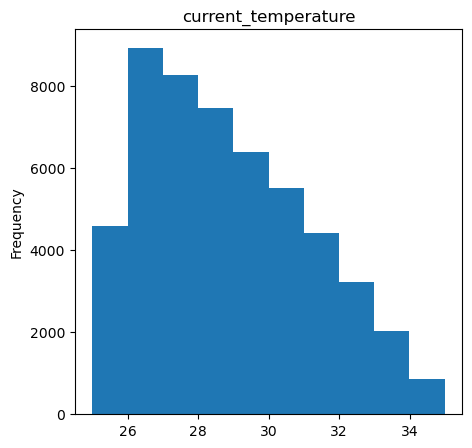

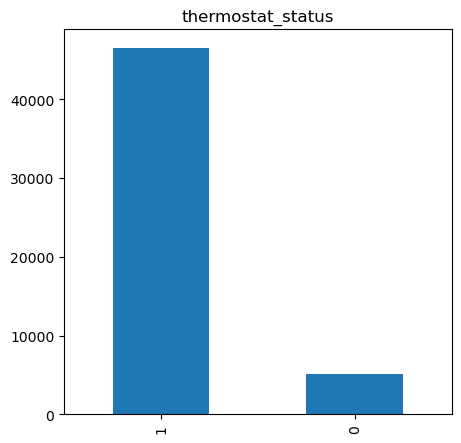

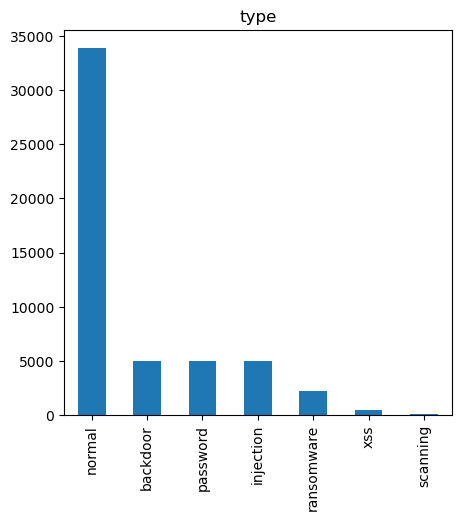

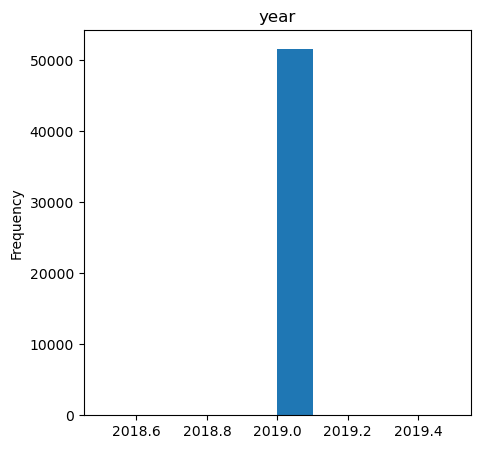

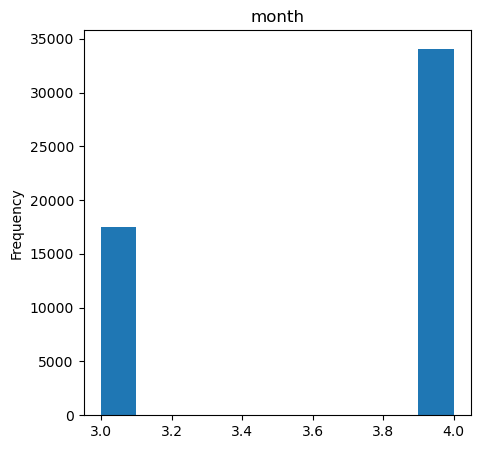

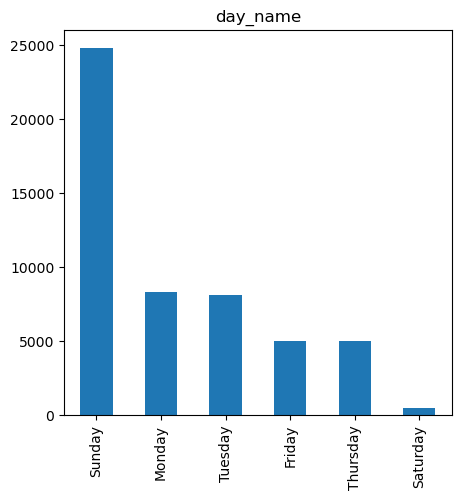

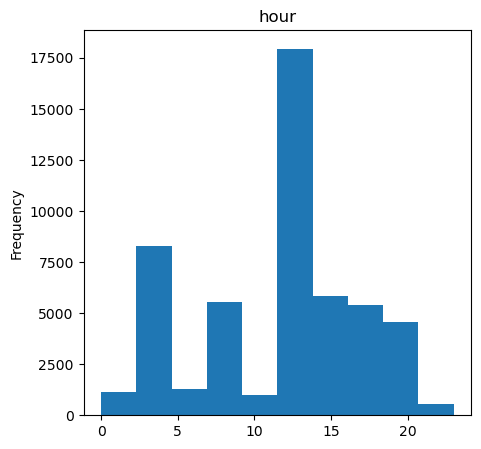

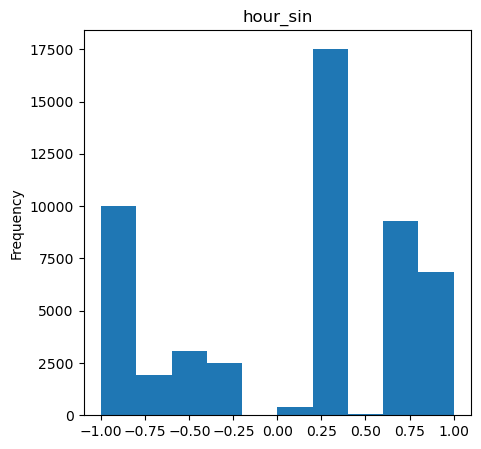

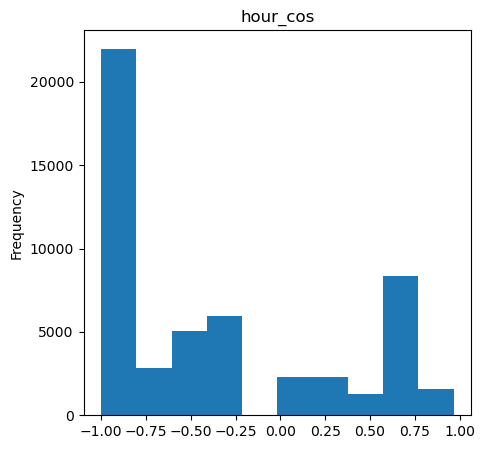

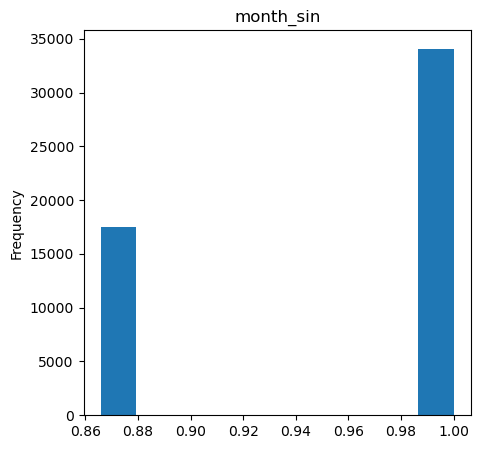

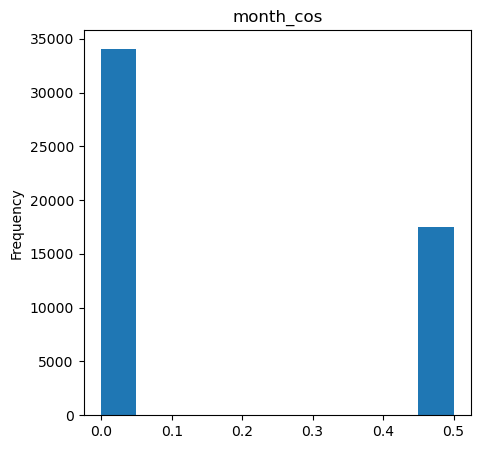

In [30]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [31]:
df

,current_temperature,thermostat_status,type,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,30.577325,1,injection,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
1,29.187912,1,injection,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
2,30.208893,1,injection,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
3,27.731392,1,injection,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
4,26.211462,1,injection,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
52769,26.571629,1,normal,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52770,26.473615,1,normal,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52771,26.551514,1,normal,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52772,26.517323,1,normal,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17


In [32]:
df['type'].value_counts()

normal        33856
backdoor       5000
password       5000
injection      4993
ransomware     2261
xss             449
scanning         61
Name: type, dtype: int64

In [33]:
# encoding categorical data using dummies
#from sklearn.preprocessing import LabelEncoder
#categorical_features = ['type']
#for i in categorical_features:
  # df[i] = LabelEncoder().fit_transform(df[i])

In [34]:
df['type'].value_counts()

normal        33856
backdoor       5000
password       5000
injection      4993
ransomware     2261
xss             449
scanning         61
Name: type, dtype: int64

In [35]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['day_name','thermostat_status'],return_df=True)

In [36]:
df=encoder.fit_transform(df) 

In [37]:
df

,current_temperature,thermostat_status_0,thermostat_status_1,type,year,month,day_name_0,day_name_1,day_name_2,hour,hour_sin,hour_cos,month_sin,month_cos
0,30.577325,0,1,injection,2019,4,0,0,1,8,0.965926,-0.258819,1.0,6.123234e-17
1,29.187912,0,1,injection,2019,4,0,0,1,8,0.965926,-0.258819,1.0,6.123234e-17
2,30.208893,0,1,injection,2019,4,0,0,1,8,0.965926,-0.258819,1.0,6.123234e-17
3,27.731392,0,1,injection,2019,4,0,0,1,8,0.965926,-0.258819,1.0,6.123234e-17
4,26.211462,0,1,injection,2019,4,0,0,1,8,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52769,26.571629,0,1,normal,2019,4,0,1,1,15,-0.500000,-0.866025,1.0,6.123234e-17
52770,26.473615,0,1,normal,2019,4,0,1,1,15,-0.500000,-0.866025,1.0,6.123234e-17
52771,26.551514,0,1,normal,2019,4,0,1,1,15,-0.500000,-0.866025,1.0,6.123234e-17
52772,26.517323,0,1,normal,2019,4,0,1,1,15,-0.500000,-0.866025,1.0,6.123234e-17


<AxesSubplot:>

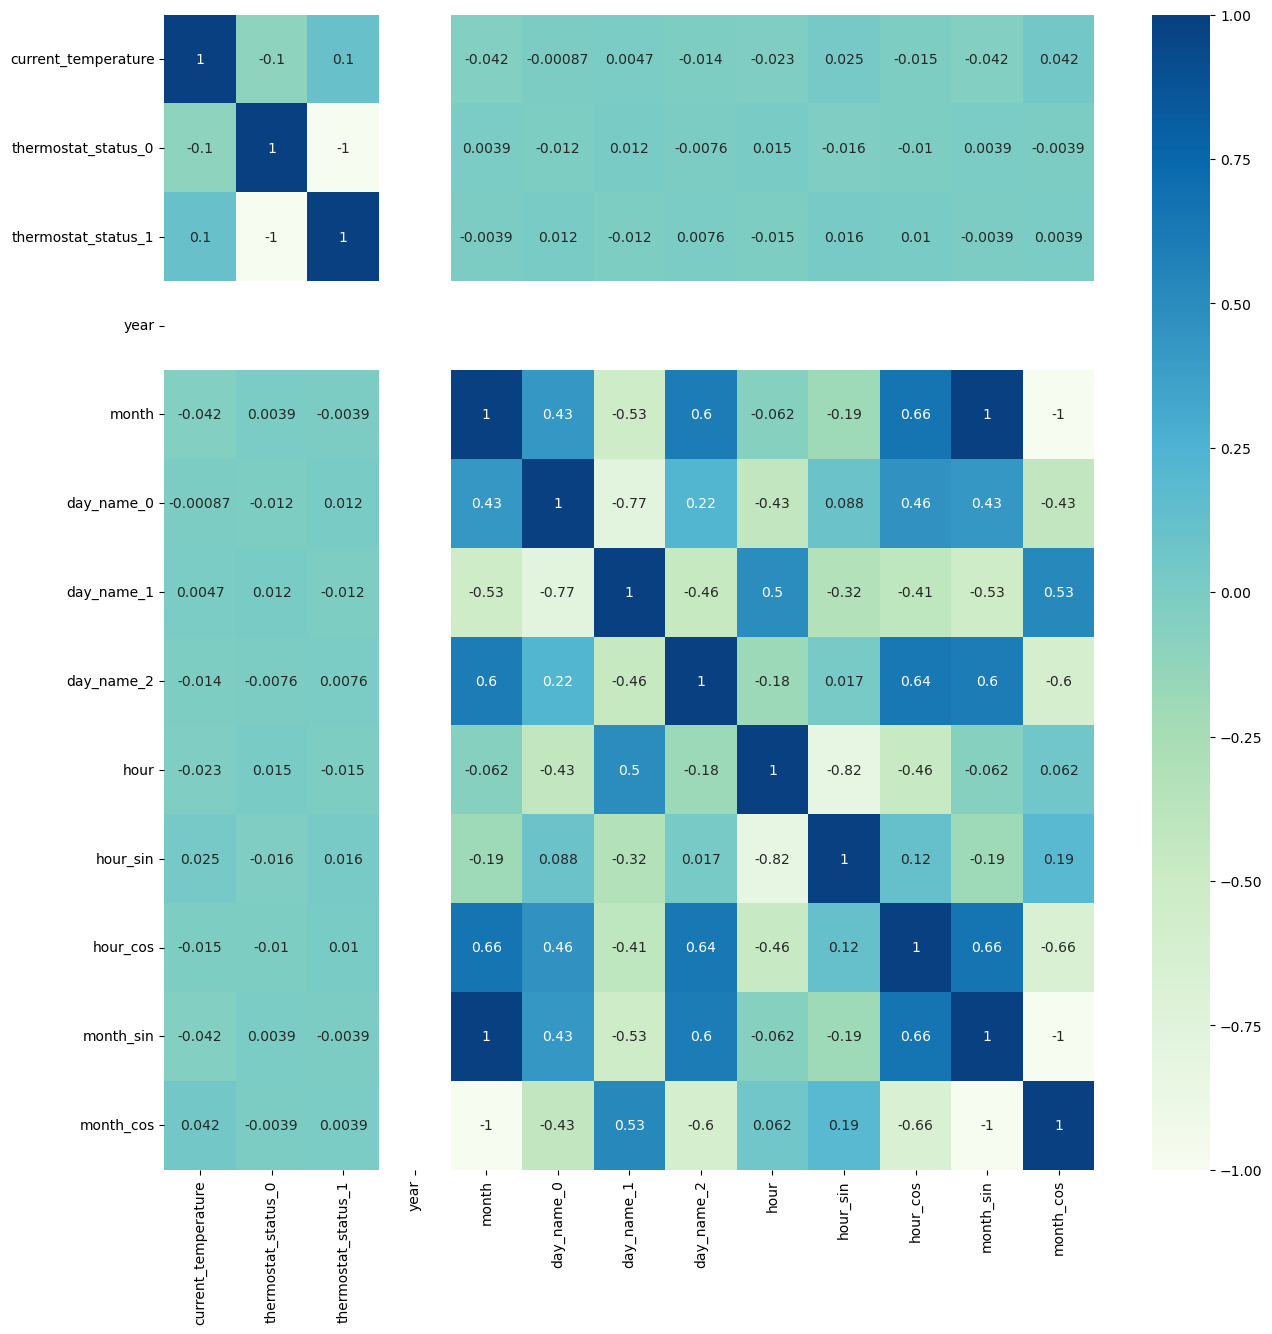

In [38]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [39]:
list(df.columns)

['current_temperature',
 'thermostat_status_0',
 'thermostat_status_1',
 'type',
 'year',
 'month',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [40]:
# select and rearrange columns
df = df[['current_temperature',
 'thermostat_status_0',
 'thermostat_status_1',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos','type']]

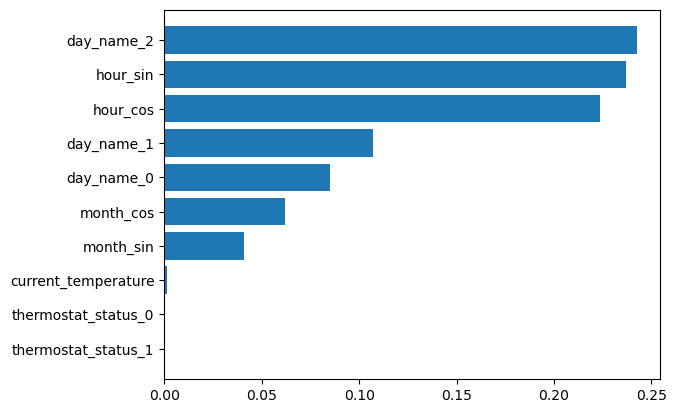

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

X = df.iloc[:,:-1]
y = df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import datasets


sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      1500
   injection       1.00      1.00      1.00      1498
      normal       1.00      1.00      1.00     10157
    password       1.00      1.00      1.00      1500
  ransomware       1.00      1.00      1.00       678
    scanning       1.00      1.00      1.00        18
         xss       1.00      1.00      1.00       135

    accuracy                           1.00     15486
   macro avg       1.00      1.00      1.00     15486
weighted avg       1.00      1.00      1.00     15486



In [43]:
# split dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify =y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

KeyError: 'label'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=14,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf.estimators_[0], feature_names=X.columns, filled=True)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify =y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, max_depth=10,random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
len(regressor.estimators_)

In [ ]:

from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(regressor.estimators_[0], feature_names=X.columns, filled=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
df

In [ ]:
### 3. Model Building  ###

# split dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# implement logistic regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
### 4. Model Evaluation  ###
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(reg, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



# ROC curve and AUC
y_pred_proba = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:", round(auc,2))

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

In [ ]:
# recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

In [ ]:
# precision
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)